### Deep Learning algorithm to classify the cell_images for the for malaria desease.
- uninfected cells
- parasitized cells

In [18]:
import os
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from matplotlib.image import imread
from matplotlib.pyplot import imshow

In [8]:
path = 'D:\DataWorld\Deep learning\cell_images'

In [9]:
path

'D:\\DataWorld\\Deep learning\\cell_images'

In [10]:
os.listdir(path)

['test', 'train']

In [12]:
test_path = path + '\\test'
train_path = path + '\\train'

In [13]:
os.listdir(test_path)

['parasitized', 'uninfected']

In [14]:
os.listdir(train_path)

['parasitized', 'uninfected']

In [16]:
len(os.listdir(train_path+'\\parasitized'))

12480

In [20]:
os.listdir(train_path+'\\parasitized')[0]

'C100P61ThinF_IMG_20150918_144104_cell_162.png'

In [37]:
firstcell=train_path+'\\parasitized\\'+os.listdir(train_path+'\\parasitized')[0]

imread(firstcell).shape

(148, 142, 3)

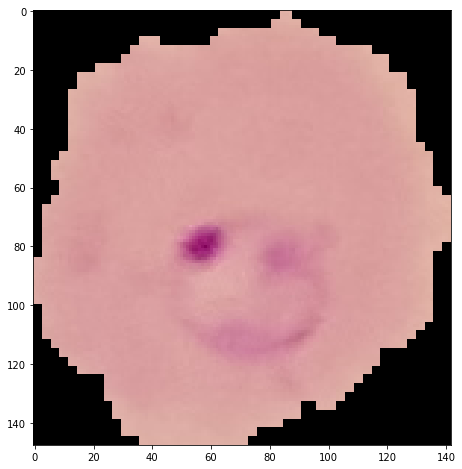

In [29]:
plt.figure(figsize=(10,8))
plt.imshow(imread(firstcell))

# Total number of images

In [30]:
len(os.listdir(train_path+'\\parasitized'))

12480

In [31]:
len(os.listdir(train_path+'\\uninfected'))

12480

In [32]:
len(os.listdir(test_path+'\\uninfected'))

1300

In [33]:
len(os.listdir(test_path+'\\parasitized'))

1300


## Finding the size of each image in dataset
- Ideally size of each image should be same

In [42]:
# parasitized images

dim1 = []
dim2 = []

for image_filename in os.listdir(train_path+'\\parasitized'):
    dim1.append(imread(train_path+'\\parasitized\\'+image_filename).shape[0])
    dim2.append(imread(train_path+'\\parasitized\\'+image_filename).shape[1])
    


In [41]:
len(dim1), len(dim2)

(12479, 12479)

C:\Users\Mein Pc\.conda\envs\nlp_course\lib\site-packages\seaborn\_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


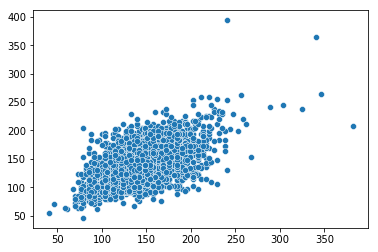

In [43]:
sns.scatterplot(dim1, dim2)

In [48]:
np.array(dim1).mean(),np.array(dim2).mean()

(134.360205144643, 133.66447632021797)

In [50]:
# uninfected imgaes

dim1 = []
dim2 = []

try:
    for image_filename in os.listdir(train_path+'\\uninfected'):
        dim1.append(imread(train_path+'\\uninfected\\'+image_filename).shape[0])
        dim2.append(imread(train_path+'\\uninfected\\'+image_filename).shape[1])
except:
    pass

C:\Users\Mein Pc\.conda\envs\nlp_course\lib\site-packages\seaborn\_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


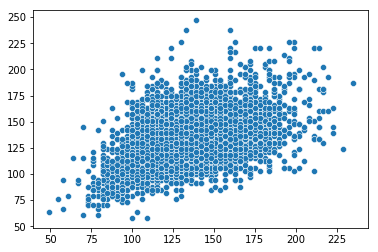

In [51]:
sns.scatterplot(dim1, dim2)

In [52]:
np.array(dim1).mean(),np.array(dim2).mean()

(131.64820899110507, 131.4041990544114)

In [53]:
# so new image shape would be...
image_shape = (130,130,3)

### Both datasets ( parasitezed and uninfected ) have images with variety of sizes. Their mean size comes out to be 130 by 130 for both. 

## Augmenting the data

In [54]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator

In [87]:
img_gen = ImageDataGenerator(rotation_range = 20, 
                            width_shift_range = 0.1,
                            height_shift_range = 0.1,
                            shear_range = 0.1,
                            zoom_range = 0.1,
                            horizontal_flip = True,
                            fill_mode = 'nearest')

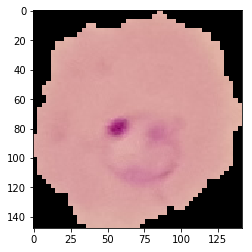

In [88]:
# Lets check one cell
par_cell = imread(firstcell)
plt.imshow(par_cell)

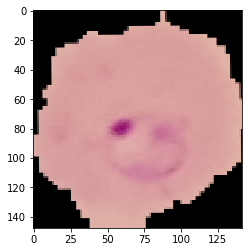

In [89]:
imshow(img_gen.random_transform(par_cell))

In [93]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import MaxPool2D, Conv2D,Dense, Dropout, Flatten

In [95]:
model = Sequential()

model.add(Conv2D(filters=32, kernel_size=(3,3), input_shape=image_shape, activation = 'relu'))
model.add(MaxPool2D(pool_size=(2,2)))

model.add(Conv2D(filters=32, kernel_size=(3,3), input_shape=image_shape, activation = 'relu'))
model.add(MaxPool2D(pool_size=(2,2)))

model.add(Conv2D(filters=32, kernel_size=(3,3), input_shape=image_shape, activation = 'relu'))
model.add(MaxPool2D(pool_size=(2,2)))

model.add(Flatten())

model.add(Dense(128,activation= 'relu'))
model.add(Dropout(0.5))

model.add(Dense(1,activation= 'sigmoid'))

model.compile( loss='binary_crossentropy', optimizer ='adam',
             metrics=['accuracy'])






In [96]:
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 128, 128, 32)      896       
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 64, 64, 32)        0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 62, 62, 32)        9248      
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 31, 31, 32)        0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 29, 29, 32)        9248      
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 14, 14, 32)        0         
_________________________________________________________________
flatten (Flatten)            (None, 6272)              0

In [97]:
from tensorflow.keras.callbacks import EarlyStopping

In [98]:
early_stop = EarlyStopping( monitor = 'val_loss', patience = 2)

In [99]:
batch_size = 16

In [101]:
train_img_gen = img_gen.flow_from_directory( train_path, 
                                            target_size =image_shape[:2],
                                           color_mode = 'rgb',
                                           batch_size= batch_size,
                                           class_mode = 'binary')

test_img_gen = img_gen.flow_from_directory( test_path, 
                                            target_size =image_shape[:2],
                                           color_mode = 'rgb',
                                           batch_size= batch_size,
                                           class_mode = 'binary',
                                          shuffle=False)

Found 24958 images belonging to 2 classes.
Found 2600 images belonging to 2 classes.


In [103]:
train_img_gen.class_indices

{'parasitized': 0, 'uninfected': 1}

In [104]:
results = model.fit_generator(train_img_gen,epochs=20,
                              validation_data = test_img_gen,
                             callbacks=[early_stop])

Instructions for updating:
Please use Model.fit, which supports generators.
Epoch 1/20
1560/1560 [==============================] - 519s 333ms/step - loss: 0.8683 - accuracy: 0.5482 - val_loss: 0.6829 - val_accuracy: 0.5723
Epoch 2/20
1560/1560 [==============================] - 529s 339ms/step - loss: 0.6782 - accuracy: 0.5779 - val_loss: 0.6739 - val_accuracy: 0.5800
Epoch 3/20
1560/1560 [==============================] - 548s 352ms/step - loss: 0.6742 - accuracy: 0.5903 - val_loss: 0.6674 - val_accuracy: 0.6046
Epoch 4/20
1560/1560 [==============================] - 555s 356ms/step - loss: 0.6760 - accuracy: 0.5845 - val_loss: 0.6652 - val_accuracy: 0.5958
Epoch 5/20
1560/1560 [==============================] - 547s 351ms/step - loss: 0.6729 - accuracy: 0.5945 - val_loss: 0.6835 - val_accuracy: 0.5608
Epoch 6/20
1560/1560 [==============================] - 536s 344ms/step - loss: 0.6719 - accuracy: 0.5905 - val_loss: 0.6676 - val_accuracy: 0.6115


In [105]:
results

In [107]:
model.metrics_names

['loss', 'accuracy']

In [108]:
model.evaluate_generator(test_img_gen)

Instructions for updating:
Please use Model.evaluate, which supports generators.


[0.6713636517524719, 0.6000000238418579]

In [110]:
model.save('img_classification_model.h5')